# Predicting Airline Booking Completion with Machine Learning

In this project, we aim to model and predict customer booking behavior for an airline. 
Specifically, we use a machine learning model to predict whether a booking will be completed 
based on customer preferences and booking characteristics.

---

## Project Goals

- Explore and understand airline booking data.
- Build a classification model to predict booking completion.
- Interpret which features are most important in predicting outcomes.

---

## Dataset Summary

The dataset contains customer booking records with features such as:
- Number of passengers
- Sales channel (Internet, Travel Agent, etc.)
- Trip type (OneWay, RoundTrip)
- Booking lead time
- Travel duration
- Flight preferences (e.g., baggage, meals)
- Target variable: `booking_complete` (0 or 1)


## 1. Data Loading and Initial Exploration

We begin by importing libraries and loading the dataset to understand its structure.


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

# Preview data
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [58]:
# Dataset summary
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. However we do have some categorical data like `flight_day` which we'll need to encode as numerical values for modelling.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


## 2. Data Preprocessing

We'll clean and prepare the data for modeling:
- Check for and handle missing values
- Encode categorical variables
- Ensure all data types are appropriate

In [59]:
# Encode categorical features using one-hot encoding or label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
	df[column] = label_encoder.fit_transform(df[column])

# Confirm encoding
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,1.987620,84.940480,23.04456,9.06634,3.069860,391.905800,38.263340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,2.029833,227.297259,32.756539,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.00000,5.00000,1.000000,203.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.00000,9.00000,3.000000,381.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.00000,13.00000,5.000000,611.000000,57.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,6.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


## 3. Exploratory Data Analysis

Let’s explore relationships between features and the target variable `booking_complete`.


What we want to model is how the `booking_completed` variable depends on the others, meaning how do the different features of the data explain whether or not a buyer completed the booking. This will mean we can make meaningful predictions as to whether the buyer is more or less likely to complete a booking in the future. To begin we'll plot the factional completion rate i.e. $n_{x=1}  / n_{x=0}$ where x is the `booking_completed` flag against some of the other variables to investigate the variance explained by each feature.

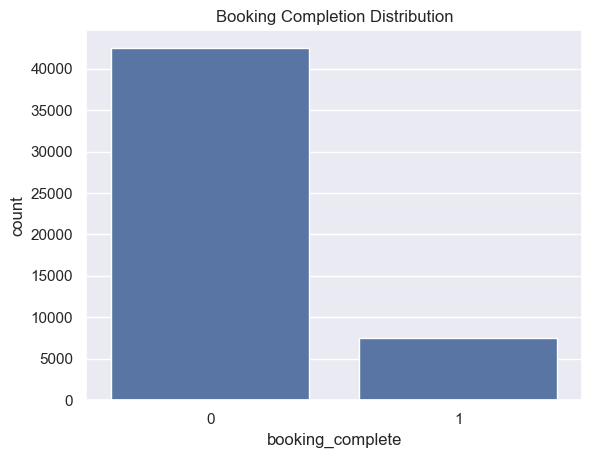

In [60]:
# Booking completion rate
sns.set_theme()
sns.countplot(x="booking_complete", data=df)
plt.title("Booking Completion Distribution")
plt.show()

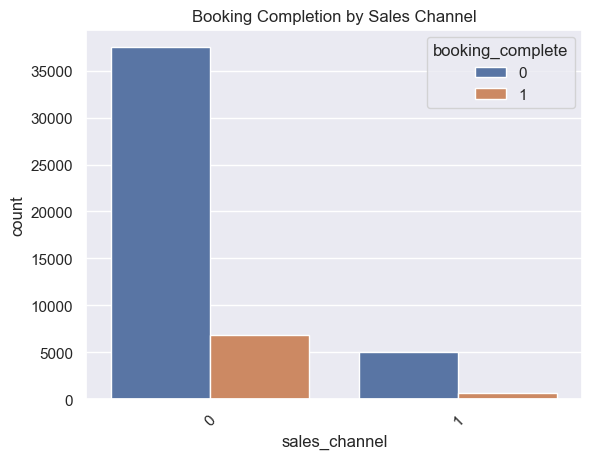

In [61]:
# Booking completion by sales channel
sns.countplot(x="sales_channel", hue="booking_complete", data=df)
plt.title("Booking Completion by Sales Channel")
plt.xticks(rotation=45)
plt.show()

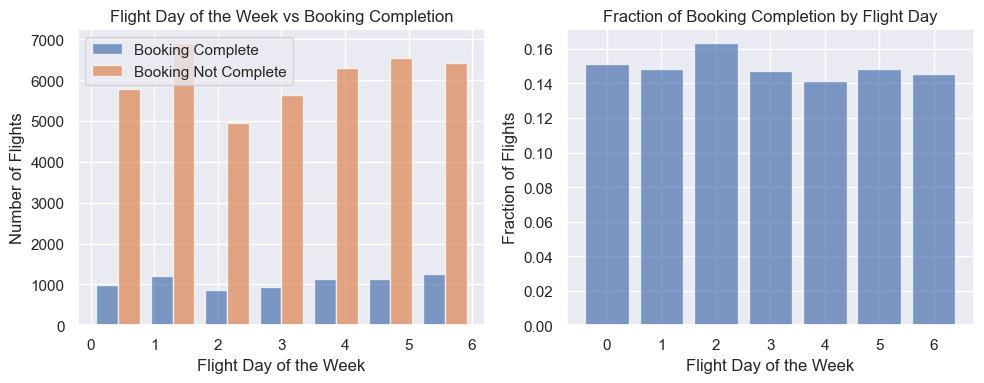

In [114]:
fig, ((ax0, ax1)) = plt.subplots(1, 2, figsize=(10, 4))
ax0.hist([df[df['booking_complete'] == 1]["flight_day"], df[df['booking_complete'] == 0]["flight_day"]], bins=7, rwidth=0.8, label=["Booking Complete", "Booking Not Complete"], alpha=0.7)
ax0.set_xlabel("Flight Day of the Week")
ax0.set_ylabel("Number of Flights")
ax0.legend()
ax0.set_title("Flight Day of the Week vs Booking Completion")

total_flights = df[df['booking_complete'] == 1]['flight_day'].value_counts() + df[df['booking_complete'] == 0]['flight_day'].value_counts()

ax1.bar(df[df['booking_complete'] == 1]["flight_day"].value_counts().index, df[df['booking_complete'] == 1]["flight_day"].value_counts()/total_flights, alpha=0.7)
ax1.set_xlabel("Flight Day of the Week")
ax1.set_ylabel("Fraction of Flights")
ax1.set_title("Fraction of Booking Completion by Flight Day")
fig.tight_layout()

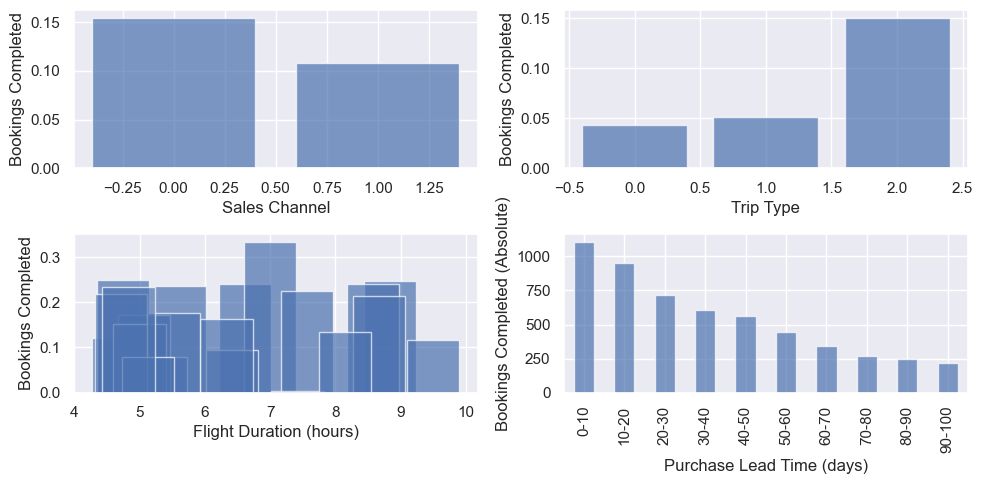

In [115]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 5))

total_flights = df[df['booking_complete'] == 1]['sales_channel'].value_counts() + df[df['booking_complete'] == 0]['sales_channel'].value_counts()

ax0.bar(df[df['booking_complete'] == 1]["sales_channel"].value_counts().index, df[df['booking_complete'] == 1]["sales_channel"].value_counts()/total_flights, alpha=0.7)
ax0.set_xlabel("Sales Channel")
ax0.set_ylabel("Bookings Completed")
total_flights = df[df['booking_complete'] == 1]['trip_type'].value_counts() + df[df['booking_complete'] == 0]['trip_type'].value_counts()

ax1.bar(df[df['booking_complete'] == 1]["trip_type"].value_counts().index, df[df['booking_complete'] == 1]["trip_type"].value_counts()/total_flights, alpha=0.7)
ax1.set_xlabel("Trip Type")
ax1.set_ylabel("Bookings Completed")

total_flights = df[df['booking_complete'] == 1]['purchase_lead'].value_counts() + df[df['booking_complete'] == 0]['purchase_lead'].value_counts()
df[df['booking_complete'] == 1]["purchase_lead"].value_counts()/total_flights.dropna()
df_purchase_lead = pd.cut(df[df['booking_complete'] == 1]['purchase_lead'], bins=range(0,101,10), labels=[f'{l}-{l+10}' for l in range(0,91,10)])
df_purchase_lead.value_counts().sort_index().plot(kind='bar', alpha=0.7, ylabel='Bookings Completed (Absolute)', xlabel='Purchase Lead Time (days)')

total_flights = df[df['booking_complete'] == 1]['flight_duration'].value_counts() + df[df['booking_complete'] == 0]['flight_duration'].value_counts()
ax2.bar(df[df['booking_complete'] == 1]["flight_duration"].value_counts().index, df[df['booking_complete'] == 1]["flight_duration"].value_counts()/total_flights.dropna(), alpha=0.7)
ax2.set_xlabel("Flight Duration (hours)")
ax2.set_ylabel("Bookings Completed")
fig.tight_layout()

## 4. Model Building: Random Forest Classifier

We'll train a Random Forest Classifier to predict booking completion. 
We'll use train/test split and evaluate accuracy and other metrics.


From these plots we can see certain features such as the day of the week have a small effect on the fractional booking rate, whereas things like trip type and flight duration have a larger effect. This means we can likely exclude some of these features later in modelling to save resources however, for now we will model with all features as the dataset is small enough.

In [117]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample, compute_class_weight
from scipy.stats import randint

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.80      0.01      0.02      1480

    accuracy                           0.85     10000
   macro avg       0.83      0.51      0.47     10000
weighted avg       0.85      0.85      0.79     10000



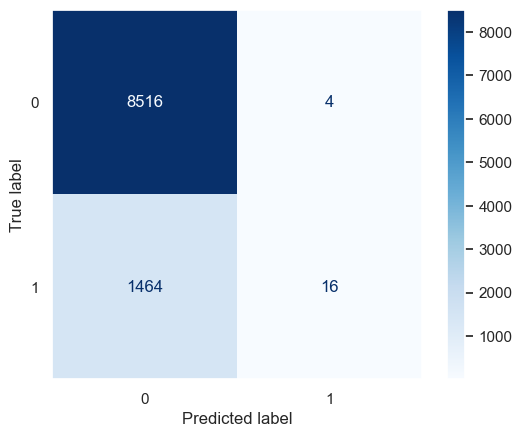

In [125]:
X = df.drop(columns=["booking_complete"]) #"wants_preferred_seat", "wants_extra_baggage", "wants_in_flight_meals", "sales_channel"]
y = df["booking_complete"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=137, max_depth=11, max_features='log2', random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.set_theme(style="dark")
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')
print(classification_report(y_test, y_pred))

83% accuracy looks pretty good but it's not until you look at the confusion matrix we see what's actually going on. Notice how our model is very biased towards predicting no booking completion, or 0 in this case. This is likely due to an over representation of the label 0 in our training set. Let's investigate the relative numbers of these labels in our original data set with the compute_class_weights function.

In [126]:
class_weights = compute_class_weight(class_weight='balanced', classes=y.unique(), y=y)
print(f'0: {class_weights[0]}, 1: {class_weights[1]}')

0: 0.587930953388834, 1: 3.3431398769724527


As expected, bookings outnumber cancellations around 6:1, so we need to resample the data to balance the classes. We will use the `NearMiss` from `imblearn` to achieve this.

In [127]:
from imblearn.under_sampling import NearMiss
near = NearMiss(sampling_strategy="majority", version=2, n_neighbors=4, n_jobs=-1)
resampled_X, resampled_y = near.fit_resample(X, y)

class_weights = compute_class_weight(class_weight='balanced', classes=resampled_y.unique(), y=resampled_y)
print(f'0: {class_weights[0]}, 1: {class_weights[1]}')

0: 1.0, 1: 1.0


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1522
           1       0.98      0.87      0.92      1470

    accuracy                           0.93      2992
   macro avg       0.93      0.93      0.93      2992
weighted avg       0.93      0.93      0.93      2992



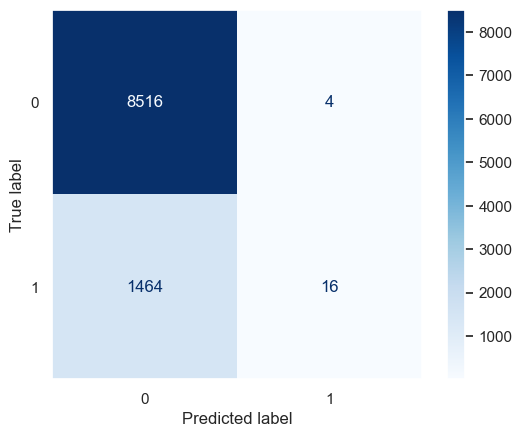

In [128]:
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=42)

brf = RandomForestClassifier(n_estimators=137, max_depth=11, max_features='log2', random_state=42)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')
print(classification_report(y_test, y_pred))

Hyperparameter tuning to further improve the model

In [ ]:
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
random_search = RandomizedSearchCV(estimator=brf, param_distributions=param_dist, cv=5, n_iter=5, random_state=42)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

print(f"Best Parameters: {random_search.best_params_}")

Now we can compare our models visually by plotting a roc graph and precision against recall for both models

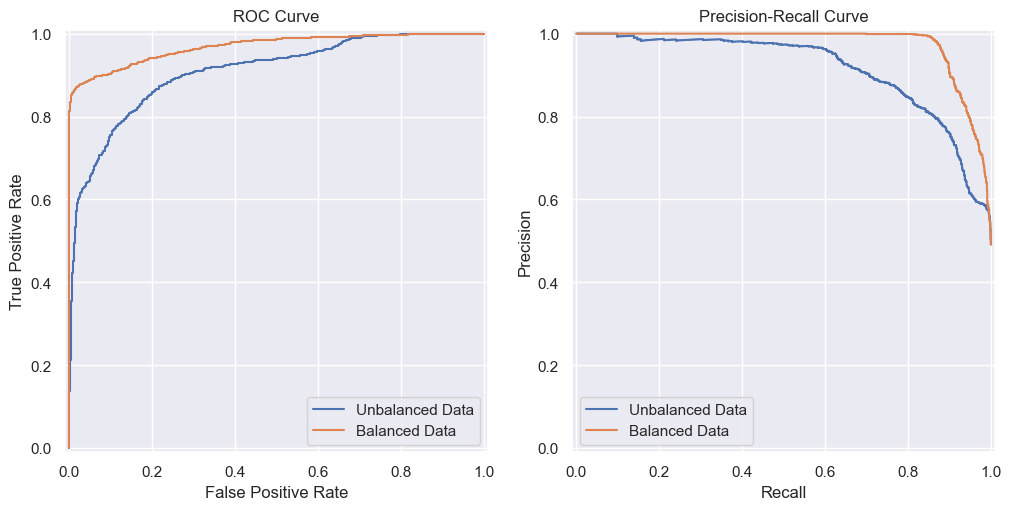

In [134]:
fpr1, tpr1, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label=rf.classes_[1])
roc_display1 = RocCurveDisplay(fpr=fpr1, tpr=tpr1)

pr_curve1 = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label=rf.classes_[1])
pr_display1 = PrecisionRecallDisplay(precision=pr_curve1[0], recall=pr_curve1[1])

fpr2, tpr2, _ = roc_curve(y_test, brf.predict_proba(X_test)[:, 1], pos_label=brf.classes_[1])
roc_display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2)

pr_curve2 = precision_recall_curve(y_test, brf.predict_proba(X_test)[:, 1], pos_label=brf.classes_[1])
pr_display2 = PrecisionRecallDisplay(precision=pr_curve2[0], recall=pr_curve2[1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display1.plot(ax=ax1, name='Unbalanced Data')
roc_display2.plot(ax=ax1, name='Balanced Data')
pr_display1.plot(ax=ax2, name='Unbalanced Data')
pr_display2.plot(ax=ax2, name='Balanced Data')

sns.set_theme()
ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')
plt.show()

## 5. Feature Importance

Understanding which features influence the model most can guide business decisions.


<Axes: title={'center': 'Feature Importances - Balanced Data'}>

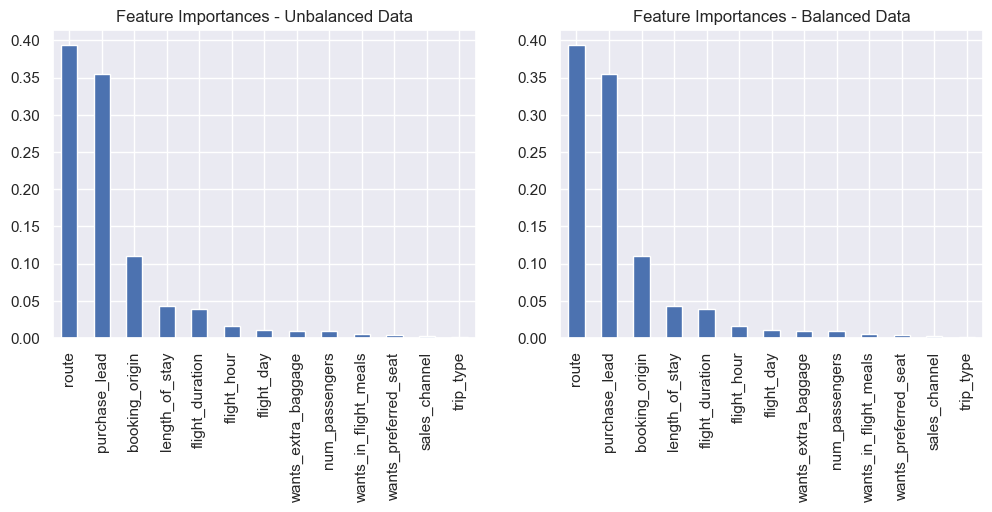

In [149]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances2 = pd.Series(brf.feature_importances_, index=X_train.columns).sort_values(ascending=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Feature Importances - Unbalanced Data')
ax2.set_title('Feature Importances - Balanced Data')
feature_importances.plot(kind='bar', ax=ax1)
feature_importances2.plot(kind='bar', ax=ax2)
#print(np.cumsum(feature_importances))

## 6. Conclusion

- The model performs reasonably well in predicting booking completion.
- Key features influencing customer behavior include route, purchase lead, and booking origin.
- This model can be integrated into customer experience platforms to predict and reduce booking drop-offs.

Further improvements could include:
- Comparing with other models (Logistic Regression, Gradient Boosting)
- Time-based or user-behavioral features if available